In [5]:

from retriever import Retriever
from query_grader import Grader
from qa_rag import RAG
from tools import Tools
from graphstate import Graph
%load_ext autoreload
%autoreload 2

similarity_threshold_retriver = Retriever().create_retriever()
doc_grader = Grader().create_grader()
question_rewriter = RAG().rephraser()
web_tool = Tools().tavily_search_tool()
wiki_tool = Tools().wiki_search_tool()
arxiv_tool = Tools().arxiv_search_tool()
qa_rag_chain = RAG().create_rag_chain()

graph = Graph(similarity_threshold_retriever=similarity_threshold_retriver,
              doc_grader=doc_grader,
              question_rewriter=question_rewriter,
              web_search_tool=web_tool,
              wiki_search_tool=wiki_tool,
              arxiv_search_tool=arxiv_tool,
              qa_rag_chain=qa_rag_chain).build_graph()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:retriever:Loaded 1 documents.
INFO:retriever:Split documents into 73 chunks.
INFO:retriever:FAISS index already exists. Loading existing index...
INFO:retriever:Loaded existing FAISS index!
INFO:retriever:Retriever created successfully
INFO:query_grader:Created a query grader successfully.
INFO:qa_rag:created a rephraser chain
INFO:tools:Created a tavily web search tool successfully.
INFO:tools:Created a wikipedia search tool successfully.
INFO:tools:Created a arxiv search tool successfully.
INFO:qa_rag:created a prompt template for qa rag
INFO:qa_rag:created a qa rag chain


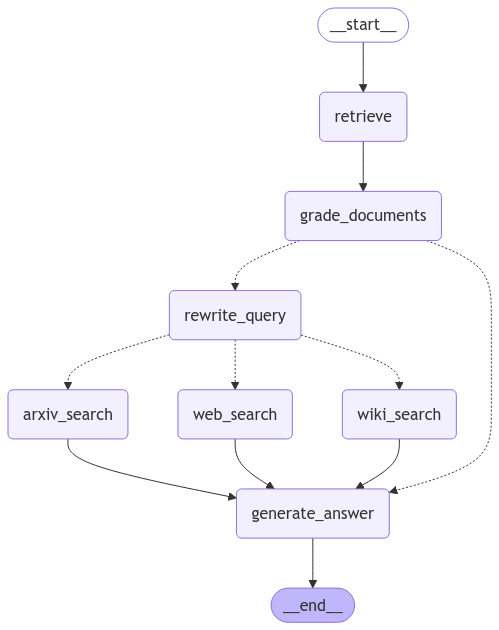

In [3]:
graph

In [9]:
from IPython.display import Markdown, display
query = "who won chanpions league in 2024"
response = graph.invoke({'question': query})  

display(Markdown(response['generation']))


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is irrelevant
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is irrelevant
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is irrelevant
INFO:graphstate:Some or all documents are irrelevant
INFO:graphstate:Rephrasing the query
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Rephrased query: Who won the UEFA Champions League in 2024? 
 
INFO:graphstate:Created llm router to route to wikipedia, arxiv or web search
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:---Routing to web search---
INFO:graphstate:Performing web search
INFO:graphstate:Generating Answer
INFO:httpx:HTTP Request: POST https://ap

Real Madrid won the UEFA Champions League in 2024. 
